# Boston Housing

Criaremos modelos preditivos para o setor imobiliário utilizando [_The Boston Housing Dataset_](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

Para a conclusão do trabalho, é importante que ele tenha:
1. **Descrição dos dados**;
2. **Separação dos dados** em treino e teste;
3. **Visualização dos dados**;
4. **Preparação dos dados**;
5. **Comparação de pelo menos 3 modelos de machine learning**, com ajustes de hiperparâmetros e justificativa da escolha do melhor;
6. **Justificativa da métrica escolhida**;
7. **Discussão da técnica de validação** e explicação de como o modelo evita *snooping bias/data leakage*;
8. **Teste final** para obter o erro aproximado.

Também é necessário apresentar um vídeo. Está disponível por meio [deste link](https://youtu.be/gCKPXKo-dVU).

## Configuração inicial

Nesta etapa, vamos configurar o ambiente de trabalho importando as bibliotecas necessárias para manipulação de dados:

- **Numpy**: realizar cálculos e trabalhar com arrays;
- **matplotlib**: criar gráficos e visualizações.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Além disso, é importante fixarmos a _seed_ para que os resultados sejam reprodutíveis.

In [2]:
seed = 21
np.random.seed(seed)

## Obtenção do conjunto de dados

Nesta seção, vamos carregar o conjunto de dados **Boston Housing**. Este conjunto de dados contém informações coletadas pelo _U.S Census Service_ sobre moradia na área de Boston, Massachusetts.

Note que a [URL](http://lib.stat.cmu.edu/datasets/boston) contém uma breve descrição do conjunto de dados. Além disso, os dados não estão bem formatados: as informações de cada casa estão distribuídas em 2 linhas. Precisamos levar isso em consideração ao importar os dados, reorganizando as linhas de modo que cada uma contenha todas as informações relevantes para cada imóvel.

Abaixo, fazemos isso ao carregar os dados, ajustando a formatação.

In [3]:
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
housing_ar = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

Precisamos ainda nomear as colunas e transformar `housing_ar` em um `DataFrame`.

In [4]:
boston_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

housing = pd.DataFrame(housing_ar, columns=boston_columns[0:13])
housing['MEDV'] = target

## Descrição dos dados

As colunas do conjunto são:

- **CRIM**: Taxa de criminalidade per capita por cidade.
- **ZN**: Proporção de zonas residenciais por lotes acima de 25.000 pés quadrados.
- **INDUS**: Proporção de áreas (acres) não comerciais (negócios) por cidade.
- **CHAS**: Variável fictícia que indica se a casa está próxima ao rio Charles (1) ou não (0).
- **NOX**: Concentração de óxidos nítricos (em partes por 10 milhões).
- **RM**: Número médio de cômodos por moradia.
- **AGE**: Proporção de casas ocupadas construídas antes de 1940.
- **DIS**: Distância ponderada entre a residência e 5 centros de emprego de Boston.
- **RAD**: Índice de acessibilidade a rodovias radiais.
- **TAX**: Valor total da taxa de imposto sobre propriedade por 10000 dólares.
- **PTRATIO**: Proporção aluno-professor por cidade.
- **B**: 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade.
- **LSTAT**: Percentual da população que é de "baixo status".
- **MEDV**: Preço médio das casas (em milhares de dólares).

O preço do imóvel (indicado pela variável **MEDV**) é a variável dependente, e o restante das variáveis são independentes, com elas que preveremos o valor do imóvel.


Iremos visualizar as 5 primeiras linhas do dataset.

In [5]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Aparentemente, as linhas seguem uma ordem: `CHAS = 0` para todos as 5 linhas; `RAD` é sequencial; `ZN = 0` para 4 das 5 linhas.

Além disso, todos os dados são numéricos.

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Note que existem 506 dados não nulos em cada uma das 14 colunas.

Já para obter uma visão geral das características do conjunto, utilizamos o método `describe()`, que fornece estatísticas descritivas das colunas numéricas:


In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


A seguir, apresentamos os histogramas.

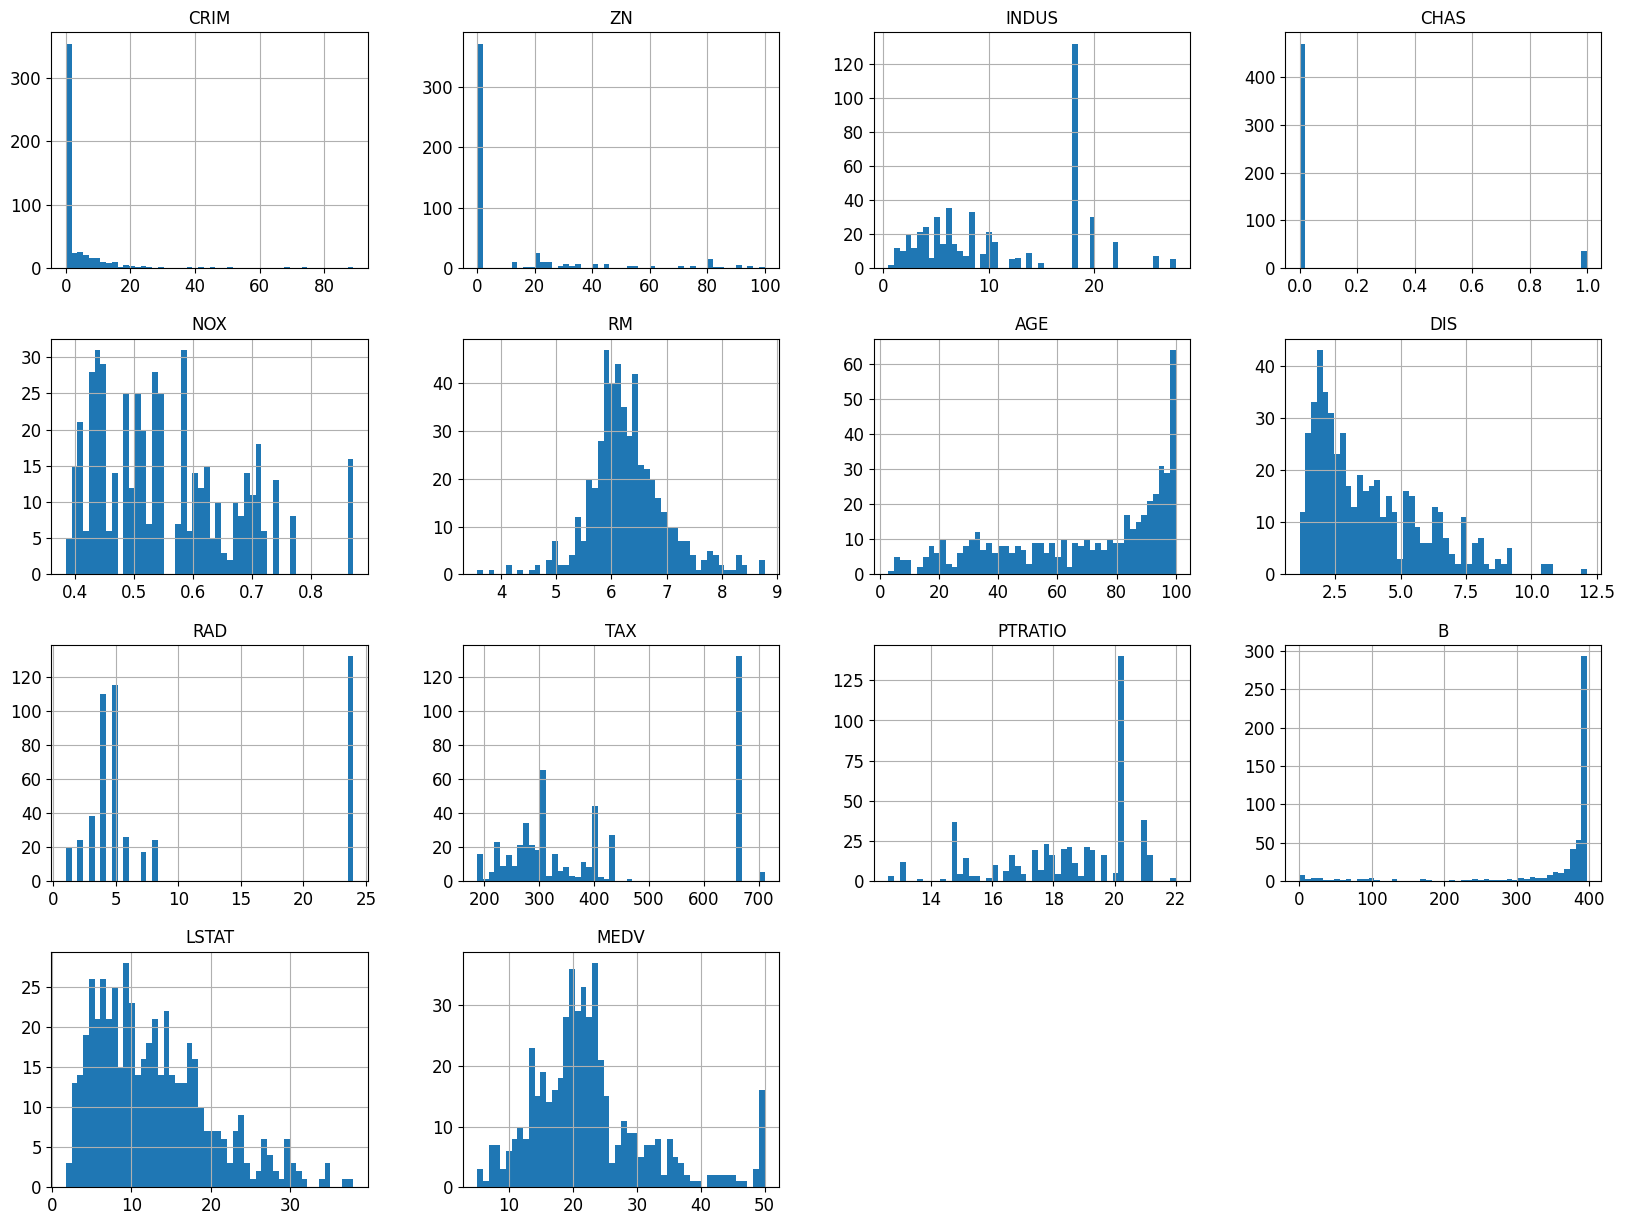

In [8]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

**Observação 1**

Esse conjunto de dados possui um problema ético significativo. Ao tentar utilizar o método `load_boston` da biblioteca `scikit-learn`, recebemos o seguinte aviso:

> The Boston housing prices dataset has an ethical problem: as investigated in [1], the authors of this dataset engineered a non-invertible variable "B" assuming that racial self-segregation had a positive impact on house prices [2]. Furthermore the goal of the research that led to the creation of this dataset was to study the impact of air quality but it did not give adequate demonstration of the validity of this assumption.

> [1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

> [2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>

Basicamente, os autores criaram a coluna não-inversível **B**, assumindo que a auto-segregação racial tinha um impacto positivo nos preços das casas. Além disso, a pesquisa que levou à criação deste conjunto de dados pretendia analisar o impacto da qualidade do ar, mas não conseguiu demonstrar essa ideia de forma adequada.

Por conta disso, irei ignorar essa coluna.








In [9]:
housing.drop(columns=['B'], inplace=True)
boston_columns.remove('B')

**Observação 2**

Como dito [aqui](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html), a variável **MEDV** parece estar limitada em 50. Essa limitação é indicada pelo fato de que o maior preço médio reportado é exatamente \$50.000 em 16 casos, enquanto 15 casos apresentam preços entre \$40.000 e \$50.000. Porém, os autores da pesquisa não fazem menção a essa limitação.














## Separação dos dados

Observe que o método `train_test_split` do `scikit-learn` por padrão já embaralha os dados. Portanto, não precisamos nos preocupar com a possível ordenação apontada anteriormente.

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing,
                                       test_size=0.2,
                                       random_state=seed)

## Visualização do conjunto de dados

A visualização de dados é essencial para compreender as relações entre variáveis.

Antes de começarmos, vamos garantir que estamos trabalhando exclusivamente no conjunto de treinamento. Isso é importante para prevenir o snooping bias, que ocorre quando informações do conjunto de teste influenciam indevidamente a construção e a avaliação de um modelo preditivo.

In [11]:
housing = train_set.copy()

**Matriz de correlação**

In [12]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

,MEDV
MEDV,1.000000
RM,0.685814
ZN,0.383460
DIS,0.254949
CHAS,0.211300
RAD,-0.365569
AGE,-0.371996
CRIM,-0.408778
NOX,-0.423129
TAX,-0.449772


Note que as variáveis que mais se relacionam com **MEDV** são **RM** e **LSTAT**. A primeira, sendo diretamente proporcional à média de preços, poderia indicar que uma casa com número de cômodos maior possui maior preço. Já a segunda indica que a população de classe mais baixa possui imóveis de valor inferior. Além disso, a proximidade com o Rio Charles e o preço médio do imóvel pouco de relacionam.

**Gráfico de dispersão**

Utilizaremos o `scatter_matrix` do pandas para plotar algumas característica em relação a outra.

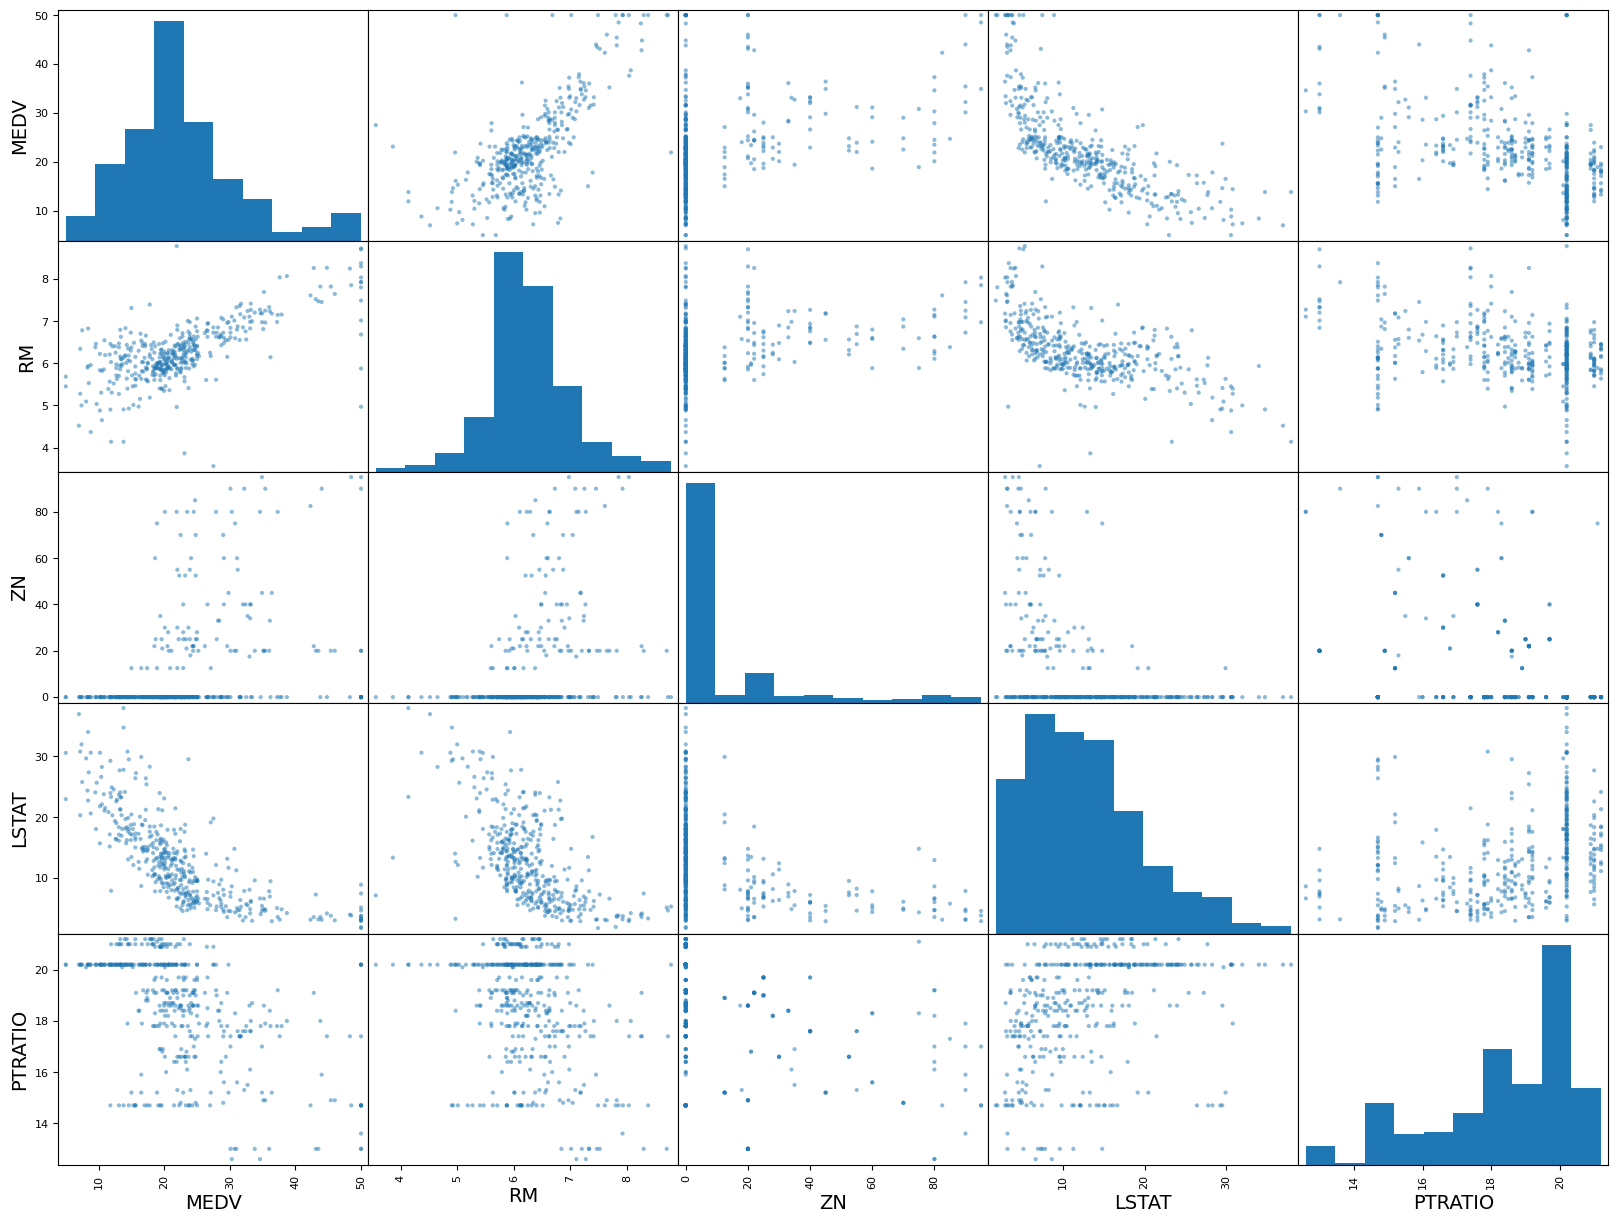

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "RM", "ZN", "LSTAT", "PTRATIO"]
scatter_matrix(housing[attributes], figsize=(20, 15))
plt.show()

## Preparação dos dados



Vejamos que todas as entradas da tabela possuem valores. Logo não precisamos nos preocupar em imputar dados faltantes.

In [14]:
print('Há entradas vazias:', housing.isnull().any().any())

Há entradas vazias: False


E também não há nenhum dado duplicado

In [15]:
print('Há dados duplicados:', housing.duplicated().values.any())

Há dados duplicados: False


Portanto, separamos os dados de treino em matriz de características (X) e vetor de saída (y).

In [16]:
X_train, y_train = train_set.drop(columns=['MEDV']), train_set['MEDV'].copy()

## Comparação entre modelos

Estaremos comparando os modelos de Regressão Linear, Support Vector Machine e Random Forest.


In [17]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

metrics = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2'])

In [18]:
def compute_metrics(name, y_true, y_pred):
    mse_value = mse(y_true, y_pred)

    metrics.loc[f"{name}"] = [
        mse_value,
        np.sqrt(mse_value),
        mae(y_true, y_pred),
        r2(y_true, y_pred)
    ]

def compute_and_print_metrics(name, y_true, y_pred):
    compute_metrics(name, y_true, y_pred)
    print(metrics)


**Regressão Linear**

In [19]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred_linear = linear.predict(X_train)

compute_and_print_metrics('Regressão Linear', y_train, y_pred_linear)

                        MSE      RMSE       MAE        R2
Regressão Linear  21.541167  4.641246  3.329104  0.737175


**Support Vector Machine**

Este método não é invariante por escala. Precisamos, portanto, normalizar nossos dados. Para isso estarei criando uma Pipeline.


In [20]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVR())
])

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_train)

compute_and_print_metrics('SVM', y_train, y_pred_svm)

                        MSE      RMSE       MAE        R2
Regressão Linear  21.541167  4.641246  3.329104  0.737175
SVM               27.197596  5.215131  2.992572  0.668160


**Random Forest**

In [21]:
from sklearn.ensemble import RandomForestRegressor

random = RandomForestRegressor(random_state=seed)
random.fit(X_train, y_train)
y_pred_random = random.predict(X_train)

compute_and_print_metrics('Random Forest', y_train, y_pred_random)

                        MSE      RMSE       MAE        R2
Regressão Linear  21.541167  4.641246  3.329104  0.737175
SVM               27.197596  5.215131  2.992572  0.668160
Random Forest      1.716188  1.310034  0.862262  0.979061


## Justificativa da métrica escolhida

Classificar o preço de imóveis é um problema de **Regressão**, então usamos métricas de erro para avaliar a qualidade do modelo.

1. **MSE (Erro Quadrático Médio)**: Mede a média dos erros ao quadrado. É útil pois penaliza erros maiores de forma mais severa, ajudando a identificar modelos que evitam grandes discrepâncias;
2. **RMSE (Raiz do Erro Quadrático Médio)**: É a raiz quadrada do MSE. Essa métrica traz o erro de volta para a mesma unidade dos dados, facilitando a interpretação.
3. **MAE (Erro Absoluto Médio)**: Mede a média da diferença entre o valor real com o predito. Esta métrica não é afetada por valores discrepantes;
3. **R² (R-quadrado)**: Indica quanto da variação nos preços o modelo consegue explicar. Quanto mais próximo de 1, melhor é o modelo.

Para o dataset Boston Housing, estamos priorizar o MSE, RMSE e R² como principais métricas de avaliação do modelo. O MSE e o RMSE são eficazes para capturar a precisão das previsões, penalizando erros maiores, o que é crucial, pois discrepâncias significativas nos preços das casas podem ter um grande impacto nas decisões de compra e venda. O R² indica a proporção da variação dos preços que o modelo consegue explicar, mostrando quão bem o modelo se ajusta aos dados. Utilizaremos o MAE apenas para avaliação complementar.

De qualquer forma, o Random Forest foi o melhor modelo para predizer os preços dos imóveis.








## Validação

Testar o desempenho de um modelo nos mesmos dados utilizados para aprender seus parâmetros é um erro que compromete a avaliação. Para lidar com essa limitação, seria ideal ter um terceiro conjunto de validação. No entanto, como temos uma quantidade limitada de dados, utilizamos a técnica de validação cruzada. Ela divide o conjunto de dados em várias partes, permitindo que o modelo seja treinado em algumas e testado em outras.








In [22]:
from sklearn.model_selection import cross_val_score

def cross_validate(model):
  cv_Score1 = cross_val_score(model, X_train, y_train, cv = 5)
  cv_Score2 = cross_val_score(model, X_train, y_train, cv = 5,
                              scoring = 'neg_mean_squared_error')
  print("R2: %0.3f (+/- %0.3f)" % (cv_Score1.mean(), cv_Score1.std() * 2))
  print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score2.mean(), cv_Score2.std() * 2))

**Regressão Linear**

In [23]:
cross_validate(linear)

R2: 0.693 (+/- 0.096)
Mean Squared Error: 24.483 (+/- 10.412)


**SVM**


In [24]:
cross_validate(svm_pipeline)

R2: 0.626 (+/- 0.210)
Mean Squared Error: 32.199 (+/- 28.085)


**Random Forest**


In [25]:
cross_validate(random)

R2: 0.840 (+/- 0.068)
Mean Squared Error: 12.434 (+/- 3.299)


O Random Forest foi o modelo com os melhores resultados. Vale mencionar que no treinamento, o Random Forest apresenta um R² muito alto e um MSE muito baixo, indicando que ele se ajusta muito bem aos dados de treino. Porém, na validação cruzada, o desempenho do Random Forest cai, o que sugere que o modelo não generaliza tão bem quanto o esperado. Provavavelmente esse modelo está sofrendo de overfitting. Isso faz sentido considerando que o nosso data set é minúsculo.

**Evitando "Snooping Bias/Data Leakage"**

 Os dados foram devidamente separados em conjuntos de treino e teste desde o início do processo. Asseguramo que, em todas as etapas subsequentes até agora, apenas o conjunto de treino foi utilizado. Isso é importante para evitar Snooping Bias/Data Leakage. Dessa forma, podemos confiar que o desempenho do nosso modelo refletirá o grau de generalização quando utilizados outros dados.



## Ajustando e selecionando o modelo


Como o Random Forest teve melhor desempenho na etapa anterior, estaremos utilizando o **GridSearch** para buscarmos hiperparâmetros melhores.

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None]
}

grid = GridSearchCV(estimator=random,
                    param_grid=param_grid,
                    cv=5,
                    scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)

best_estimator = grid.best_estimator_
best_score = -grid.best_score_

print('Modelo: RandomForest')
print(f'Melhor Score (MSE): {best_score}')
print(f'Melhores Parâmetros: {best_estimator}')


Modelo: RandomForest
Melhor Score (MSE): 12.053715664637334
Melhores Parâmetros: RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=21)


Observe que o `GridSearchCV` identificou que o Random Forest possui parâmetros melhores.

In [27]:
cross_validate(grid.best_estimator_)

R2: 0.850 (+/- 0.068)
Mean Squared Error: 12.054 (+/- 6.894)


## Modelo e teste final

Após essas etapas, podemos fazer o teste final do nosso modelo utilizando o Random Forest com seus novos parâmetros:

In [28]:
final_model = grid.best_estimator_
final_model

RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=21)

In [29]:
X_test, y_test = test_set.drop(columns=['MEDV']), test_set['MEDV'].copy()

In [30]:
y_pred_random_hyper = final_model.predict(X_test)
compute_metrics('Random Forest (hyper)', y_test, y_pred_random_hyper)
print(metrics.tail(1))

                             MSE      RMSE       MAE        R2
Random Forest (hyper)  12.665849  3.558911  2.347373  0.865405


Como os resultados de teste estão parecidos com os resultados do Cross Validation, podemos dizer que nosso modelo se comporta como o esperado.